# Prosper Loan Data Analysis
## by (Shubham Kumar)

## Preliminary Wrangling

>- **The Dataset contains 113,937 loans**, each row include infomation on the borrow's APR, Loan Status, borrowed amount, debt, etc. This document consist the analysis of Prosper's loan dataset, a personal loan company that provides a peer-to-peer lending marketplace.
- **Prosper** has been using its own rating system, represented in the loans dataset by the variable ProsperRating, which allegedly has two components: ProsperScore and CreditScore. According to Prosper, ProsperScore **was built using historical Prosper data to assess the risk of Prosper borrower listings** and CreditScore, which is provided by a reporting agency. Prosper has been using the data available in its dataset, either for Personal Data or Credit Information on the borrowers, to evaluate the ProsperScore of the borrowers, based on a model created with past data.
- **Variable definations can be found [here](https://docs.google.com/spreadsheets/d/1gDyi_L4UvIrLTEC6Wri5nbaMmkGmLQBk-Yx3z0XDEtI/edit#gid=0).**

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

**Loading Dataset**

In [2]:
original_data = pd.read_csv('prosperLoanData.csv')
loans = original_data.copy()

## Wrangling

In [3]:
# Starting Rows of the dataset.
loans.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [4]:
# Info on the dataset.
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [5]:
# Checking for duplicates.
# No duplicates
loans.duplicated().any()

False

In [6]:
# Checking if dropna() returns any data.
# Cant use dropna to remove null values.
loans.dropna().head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors


In [7]:
# Score might be the main column as this data is made from people who are scored.
loans.ProsperScore.isnull().any()

True

In [8]:
# Getting data with prosper score not null
loans = loans[loans['ProsperScore'].isnull()== False]

# Filling none instead of null in occupations column as it is categorical variable and removing null values might cause problems.
loans.Occupation.fillna('None', inplace = True)

In [9]:
# Converting Listing Categories to their original types.
def listing_category_alpha(ListingCategoryNumeric):
    if ListingCategoryNumeric==0:
        category = 'Not Available'
    if ListingCategoryNumeric==1:
        category = 'Debt Consolidation'
    if ListingCategoryNumeric==2:
        category = 'Home Improvement'
    if ListingCategoryNumeric==3:
        category = 'Business'
    if ListingCategoryNumeric==4:
        category = 'Personal Loan'
    if ListingCategoryNumeric==5:
        category = 'Student Use'
    if ListingCategoryNumeric==6:
        category = 'Auto'
    if ListingCategoryNumeric==7:
        category = 'Other'
    if ListingCategoryNumeric==8:
        category = 'Baby&Adoption'
    if ListingCategoryNumeric==9:
        category = 'Boat'
    if ListingCategoryNumeric==10:
        category = 'Cosmetic Procedure'
    if ListingCategoryNumeric==11:
        category = 'Engagement Ring'
    if ListingCategoryNumeric==12:
        category = 'Green Loans'
    if ListingCategoryNumeric==13:
        category = 'Household Expanses'
    if ListingCategoryNumeric==14:
        category = 'Large Purchases'
    if ListingCategoryNumeric==15:
        category = 'Medical/Dental'
    if ListingCategoryNumeric==16:
        category = 'Motorcycle'
    if ListingCategoryNumeric==17:
        category = 'RV'
    if ListingCategoryNumeric==18:
        category = 'Taxes'
    if ListingCategoryNumeric==19:
        category = 'Vacation'
    if ListingCategoryNumeric==20:
        category = 'Wedding Loans'
    return category

loans['ListingCategory (numeric)'] = loans['ListingCategory (numeric)'].apply(listing_category_alpha)
#Check results
loans['ListingCategory (numeric)'].unique()

array(['Home Improvement', 'Motorcycle', 'Debt Consolidation', 'Other',
       'Household Expanses', 'Auto', 'Medical/Dental', 'Wedding Loans',
       'Vacation', 'Taxes', 'Business', 'Baby&Adoption',
       'Engagement Ring', 'Large Purchases', 'Boat', 'RV',
       'Cosmetic Procedure', 'Not Available', 'Student Use',
       'Green Loans'], dtype=object)

In [10]:
# Removing Columns with 0 values, not needed and might be private and altering data
loans['ListingCreationDate'] = pd.to_datetime(loans['ListingCreationDate'])
loans['Term'] = loans['Term'].astype('category')
loans.rename(columns={'ProsperRating (Alpha)': 'ProsperRating', 
                        'ProsperRating (numeric)': 'ProsperRating_Numeric',
                        'ListingCategory (numeric)' : 'ListingCategory',
                        'TradesNeverDelinquent (percentage)' : 'TradesNeverDelinquent_percentage'
                       }, inplace=True)

# Only taking relevant data
cols = ['ProsperRating', 'ListingCategory','ProsperRating_Numeric','ProsperScore', 'EmploymentStatus', 
           'EmploymentStatusDuration', 'IncomeRange', 'IncomeVerifiable', 'StatedMonthlyIncome', 
           'DebtToIncomeRatio', 'TotalInquiries', 'CurrentDelinquencies', 'BankcardUtilization', 'TradesNeverDelinquent_percentage', 'Occupation',
            'Term', 'LoanStatus', 'EstimatedEffectiveYield' , 'BorrowerAPR' , 'BorrowerRate' , 'IsBorrowerHomeowner','MonthlyLoanPayment',
        'Recommendations','LoanOriginalAmount' ,'PercentFunded','Investors','BorrowerState']

loans = loans[cols]

In [11]:
# Checking size of dataframe
print(loans.shape)

# Making categorical data types.
categories_rating = ['HR', 'E', 'D', 'C', 'B', 'A', 'AA']
categories_range = ['Not employed', '$0', '$1-24,999', '$25,000-49,999', '$50,000-74,999', '$75,000-99,999', '$100,000+']
categories_status = ['Employed', 'Other', 'Full-time', 'Part-time', 'Retired', 'Self-employed', 'Not employed']
categories_occupation = list(loans.Occupation.unique())


pd_ver = pd.__version__.split(".")
if (int(pd_ver[0]) > 0) or (int(pd_ver[1]) >= 21): # v0.21 or later
    classes = pd.api.types.CategoricalDtype(ordered = True, categories = categories_rating)
    loans['ProsperRating'] = loans['ProsperRating'].astype(classes)
else: # pre-v0.21
    loans['ProsperRating'] = loans['ProsperRating'].astype('category', ordered = True,
                                                         categories = categories_rating)

pd_ver = pd.__version__.split(".")
if (int(pd_ver[0]) > 0) or (int(pd_ver[1]) >= 21): # v0.21 or later
    classes = pd.api.types.CategoricalDtype(ordered = True, categories = categories_range)
    loans['IncomeRange'] = loans['IncomeRange'].astype(classes)
else: # pre-v0.21
    loans['IncomeRange'] = loans['IncomeRange'].astype('category', ordered = True,
                                                         categories = categories_range)

pd_ver = pd.__version__.split(".")
if (int(pd_ver[0]) > 0) or (int(pd_ver[1]) >= 21): # v0.21 or later
    classes = pd.api.types.CategoricalDtype(ordered = True, categories = categories_status)
    loans['EmploymentStatus'] = loans['EmploymentStatus'].astype(classes)
else: # pre-v0.21
    loans['EmploymentStatus'] = loans['EmploymentStatus'].astype('category',
                                                categories = categories_status, ordered=True)
    
pd_ver = pd.__version__.split(".")
if (int(pd_ver[0]) > 0) or (int(pd_ver[1]) >= 21): # v0.21 or later
    classes = pd.api.types.CategoricalDtype(ordered = True, categories = categories_occupation)
    loans['Occupation'] = loans['Occupation'].astype(classes)
else: # pre-v0.21
    loans['Occupation'] = loans['Occupation'].astype('category',
                                                categories = categories_occupation, ordered=True)

(84853, 27)


In [12]:
# Info on new data
loans.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84853 entries, 1 to 113936
Data columns (total 27 columns):
 #   Column                            Non-Null Count  Dtype   
---  ------                            --------------  -----   
 0   ProsperRating                     84853 non-null  category
 1   ListingCategory                   84853 non-null  object  
 2   ProsperRating_Numeric             84853 non-null  float64 
 3   ProsperScore                      84853 non-null  float64 
 4   EmploymentStatus                  84853 non-null  category
 5   EmploymentStatusDuration          84834 non-null  float64 
 6   IncomeRange                       84853 non-null  category
 7   IncomeVerifiable                  84853 non-null  bool    
 8   StatedMonthlyIncome               84853 non-null  float64 
 9   DebtToIncomeRatio                 77557 non-null  float64 
 10  TotalInquiries                    84853 non-null  float64 
 11  CurrentDelinquencies              84853 non-null  flo

In [13]:
# Exporting to machine as csv format.
loans.to_csv('ProsperData_Relevant.csv', index = False)

### What is the structure of your dataset?

>- Prosper Loans Dataset after wrangling contains **84853 loans listings in the dataset with 27 variables.***
- *I have filtered out only **numeric and categorical data** for the use.*

### What is/are the main feature(s) of interest in your dataset?

>  Main Features of the dataset are : ***ProsperRatings, Prosper Scores, Occupations, Loans Listing Category, Borrower Rates, Borrowers Annual Percentage Rate, Borrowers Monthly Income, Loan Amount and Monthly Loan Payments by the Borrowers.***

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> Features which will be helping me in investigation are : ***Prosper Ratings, Prosper Score and Loan details including Occupations, Loan amount and payments by the borrowers.***

## Univariate Exploration

> *In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.*

### Listing Categories
***Why people take loan ?***

In [14]:
loans.ListingCategory.value_counts().head().reset_index()

,index,ListingCategory
0,Debt Consolidation,53180
1,Other,9218
2,Home Improvement,6801
3,Business,5298
4,Auto,2237


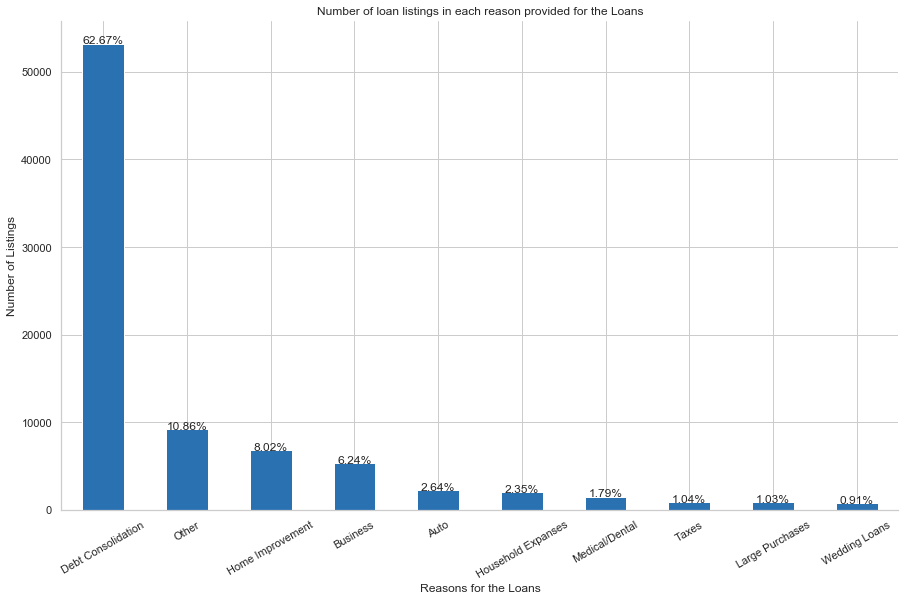

In [15]:
listing_category = loans.ListingCategory.value_counts().head(10)
base_color = sb.color_palette("RdBu_r", 7)[0]
sb.set(style = "whitegrid")

plt.figure(figsize=(15, 9))
listing_category.plot(kind = 'bar', color = base_color);

locs, labels = plt.xticks()

# Adding percentage of the people in the range.
for loc, label in zip(locs, labels):
    count = listing_category[label.get_text()]
    pct_string = '{:0.2f}%'.format(100 * count/ loans.shape[0])
    plt.text(loc, count + 8, pct_string, ha = 'center')

plt.title('Number of loan listings in each reason provided for the Loans');
plt.xlabel('Reasons for the Loans');
plt.ylabel('Number of Listings');

plt.xticks(rotation = 30);

# TO remove despine from top
sb.despine(top = True);

- As we can see from the plot, **About 63 % of people took loan for debt consolidation. Followed by Home Improvement and Business.**
- Here ``Other`` specify, that the reson for loan is for students, ***Non-Professional Services(Plumber, Firemen etc) or the reason is not specified.***
> *People are taking loans to cover their debts which is a Common Reason for the loans followed by Student loans as Education is expensive.*

### Number of Borrowers in each State.
***Which state people take most loans ?***

In [16]:
loans.BorrowerState.value_counts().head().reset_index()

,index,BorrowerState
0,CA,10761
1,NY,5844
2,TX,5634
3,FL,5406
4,IL,4264


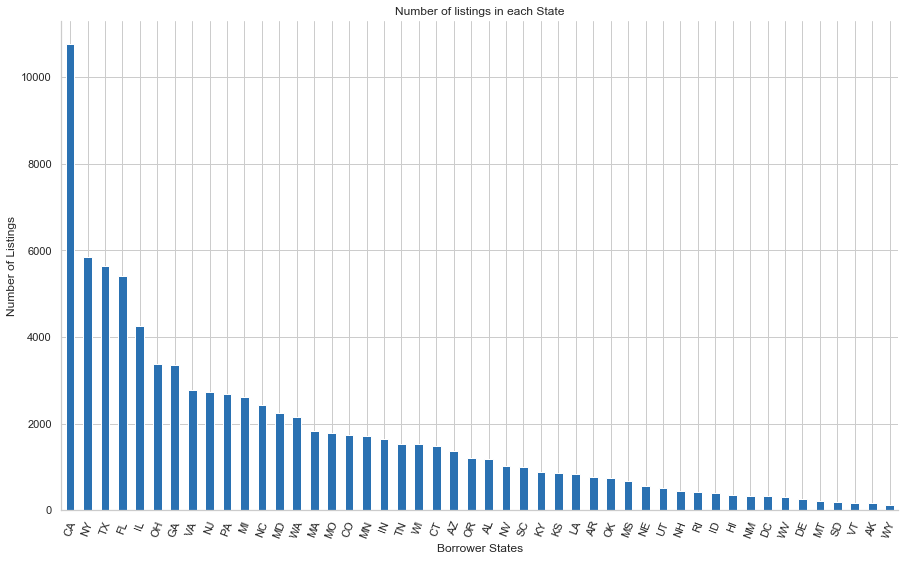

In [17]:
# Count of each state in decreasing order
plt.figure(figsize = (15,9))


states_count = loans.BorrowerState.value_counts()

base_color = sb.color_palette("RdBu_r", 7)[0]

states_count.plot(kind = 'bar', color = base_color)

plt.title('Number of listings in each State');
plt.xlabel('Borrower States');
plt.ylabel('Number of Listings');

plt.xticks(rotation = 69);

# To remove despine from the top.
sb.despine(top = True);

- **People from California, New York and Texas took most loans.**
- **People from VT, AK and WY took less Loans.**
> *There are many working professionals and students in California and New York which explains the reason for more loans in these states.*

### Income Range of the Borrowers.
***People with which income range took the most loans ?***

In [18]:
loans.IncomeRange.value_counts().reset_index()

,index,IncomeRange
0,"$50,000-74,999",25627
1,"$25,000-49,999",24175
2,"$100,000+",15205
3,"$75,000-99,999",14498
4,"$1-24,999",4654
5,Not employed,649
6,$0,45


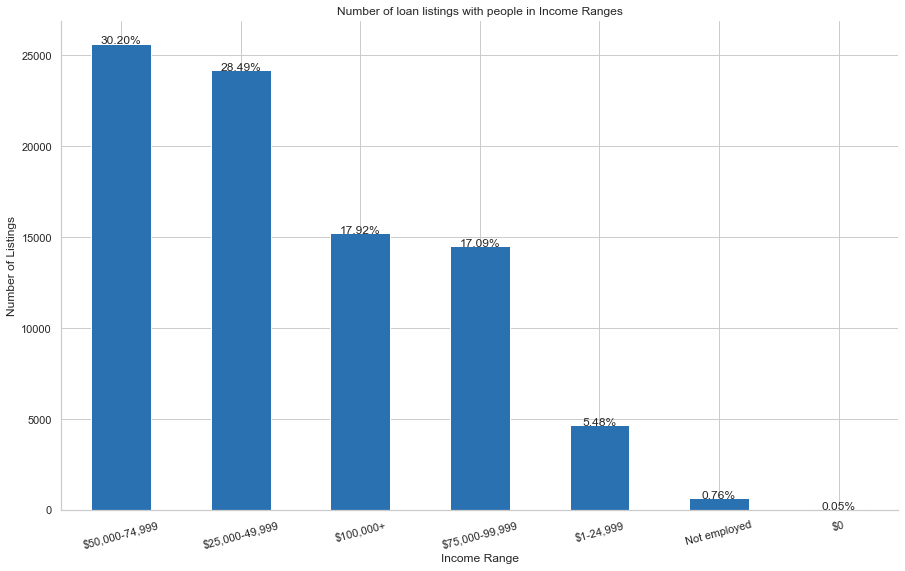

In [19]:
income_range = loans.IncomeRange.value_counts()
base_color = sb.color_palette("RdBu_r", 7)[0]

plt.figure(figsize=(15, 9))
income_range.plot(kind = 'bar', color = base_color);

locs, labels = plt.xticks()

# Adding percentage of the people in the range.
for loc, label in zip(locs, labels):
    count = income_range[label.get_text()]
    pct_string = '{:0.2f}%'.format(100 * count/ loans.shape[0])
    plt.text(loc, count + 8, pct_string, ha = 'center')

plt.title('Number of loan listings with people in Income Ranges');
plt.xlabel('Income Range');
plt.ylabel('Number of Listings');

plt.xticks(rotation = 15);
sb.despine(top = True);

- **People with higher and median incomes tends to take most loans.**
- **Unemployed people took less loans.**
> *Rich People who have higher than median income range took less loans as compared to people with median income or considered to be middle class.* 

### Loan Status in the Prosper.
***What are the loan status in Prosper ?***

In [20]:
loans.LoanStatus.value_counts().reset_index()

,index,LoanStatus
0,Current,56576
1,Completed,19664
2,Chargedoff,5336
3,Defaulted,1005
4,Past Due (1-15 days),806
5,Past Due (31-60 days),363
6,Past Due (61-90 days),313
7,Past Due (91-120 days),304
8,Past Due (16-30 days),265
9,FinalPaymentInProgress,205


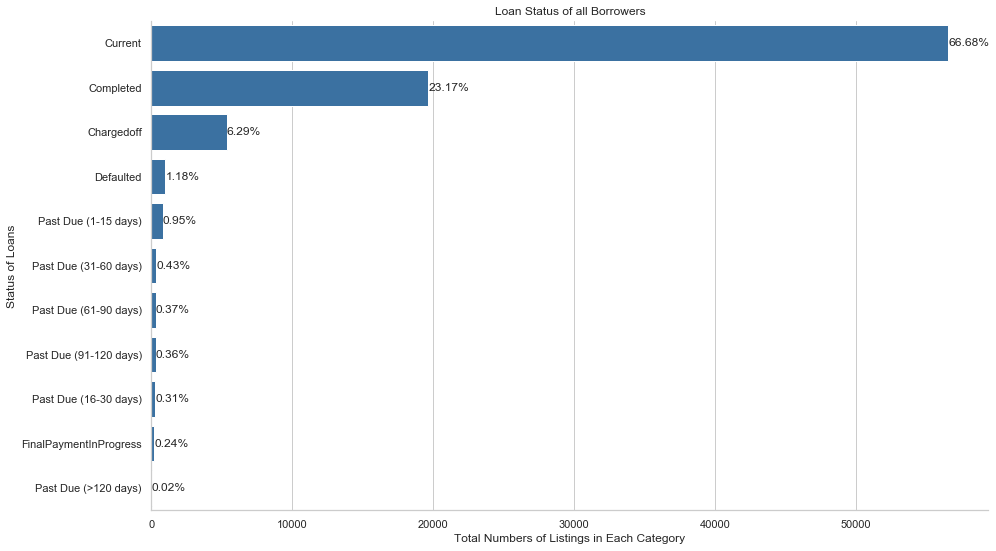

In [21]:
order = loans.LoanStatus.value_counts().index
counts = loans.LoanStatus.value_counts()

base_color = sb.color_palette("RdBu_r", 7)[0]
plt.figure(figsize = [15, 9]) 

plt.title("Loan Status of all Borrowers")
sb.countplot(data = loans, y = 'LoanStatus', color = base_color, order = order);

# Adding percentage of the loan status in the category.
for i in range(counts.shape[0]):
    count = counts.values[i]
    pct_string = '{:0.2f}%'.format(100 * count / loans.shape[0])
    plt.text(count + 1, i, pct_string, va = 'center')

plt.xlabel('Total Numbers of Listings in Each Category')
plt.ylabel('Status of Loans');
sb.despine(top = True);

- Currently Prosper have **about 67 % Loans pending.**
- **24 % People payed their loan amount and 6.3 % people are charged off.**

### Employment Status of the Borrowers.
***Which type of people took loans the most ?***

In [22]:
loans.EmploymentStatus.value_counts().reset_index()

,index,EmploymentStatus
0,Employed,67310
1,Full-time,7927
2,Self-employed,4538
3,Other,3806
4,Not employed,649
5,Retired,367
6,Part-time,256


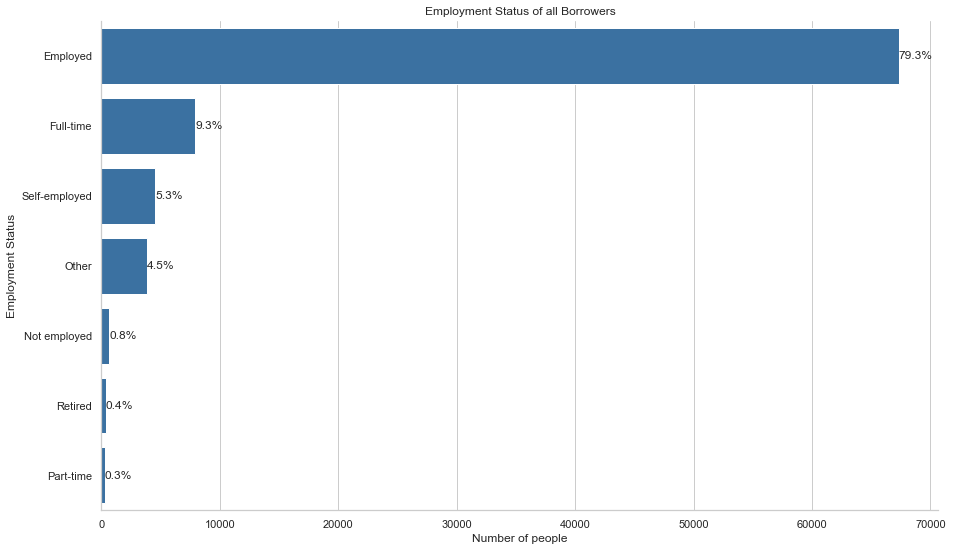

In [23]:
counts = loans.EmploymentStatus.value_counts()

base_color = sb.color_palette("RdBu_r", 7)[0]

plt.figure(figsize = [15, 9])

sb.countplot(data = loans, y = 'EmploymentStatus', color = base_color,
             order = counts.index);
plt.title("Employment Status of all Borrowers")

# Adding percentage of the people according to their employment status.
for i in range(counts.shape[0]):
    count = counts.values[i]
    pct_string = '{:0.1f}%'.format(100 * count / loans.shape[0])
    plt.text(count + 1, i, pct_string, va = 'center')
    
plt.xlabel('Number of people')
plt.ylabel("Employment Status");
sb.despine(top = True);

- **Employed People took the most loans.**
- **Unemployed people took less loans includes Retired, Part and Part time.**
> *It's obvious no one will give loans to people who have no source of paying it back.*

### Occupation of the Borrowers.
***What are the Occupations of the people who took the loans ?***

In [24]:
loans.Occupation.value_counts().reset_index().head()

,index,Occupation
0,Other,21317
1,Professional,10542
2,Executive,3468
3,Computer Programmer,3236
4,Teacher,2888


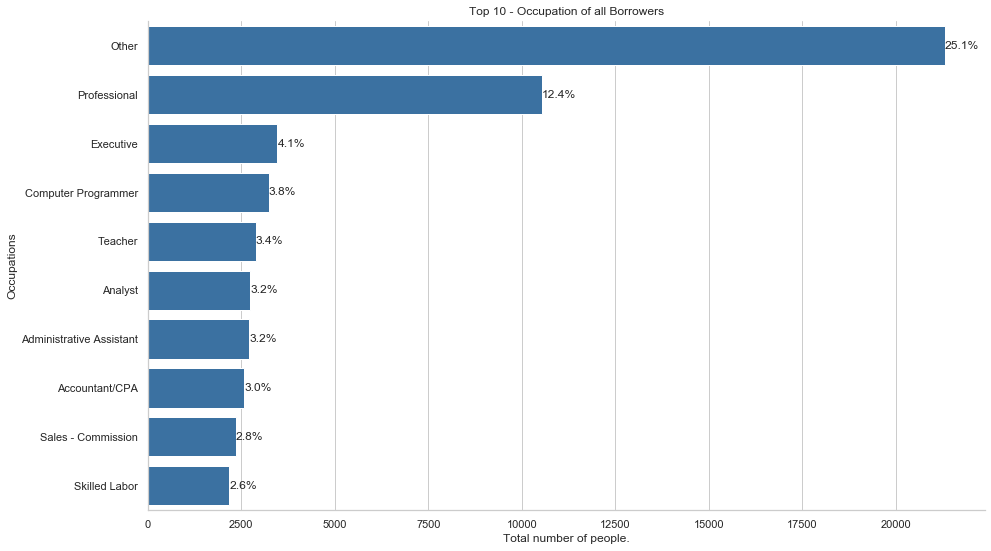

In [25]:
counts = loans.Occupation.value_counts().head(10)

plt.figure(figsize = [15, 9]) 

base_color = sb.color_palette("RdBu_r", 7)[0]

sb.countplot(data = loans, y = 'Occupation', color = base_color,
             order = counts.index );

for i in range(counts.shape[0]):
    count = counts.values[i]
    pct_string = '{:0.1f}%'.format(100 * count / loans.shape[0])
    plt.text(count + 1, i, pct_string, va = 'center')

plt.title("Top 10 - Occupation of all Borrowers");
plt.xlabel('Total number of people.')
plt.ylabel('Occupations');
sb.despine(top = True);

- **Occupation with others took most loans which might contain students and self-employed people.**
- **Professionals took most loans.**
- **Here ``Other`` is the data whose Occupation type is not recognized officially, is a student or not professional job(Firemen, Plumber etc).**
> *As ``Others`` considered as more than one jobs therefore, it has a high bar.*

### Ratings provided to the people.
***What ratings Prosper provides the people?***

In [26]:
loans.ProsperRating.value_counts().reset_index()

,index,ProsperRating
0,C,18345
1,B,15581
2,A,14551
3,D,14274
4,E,9795
5,HR,6935
6,AA,5372


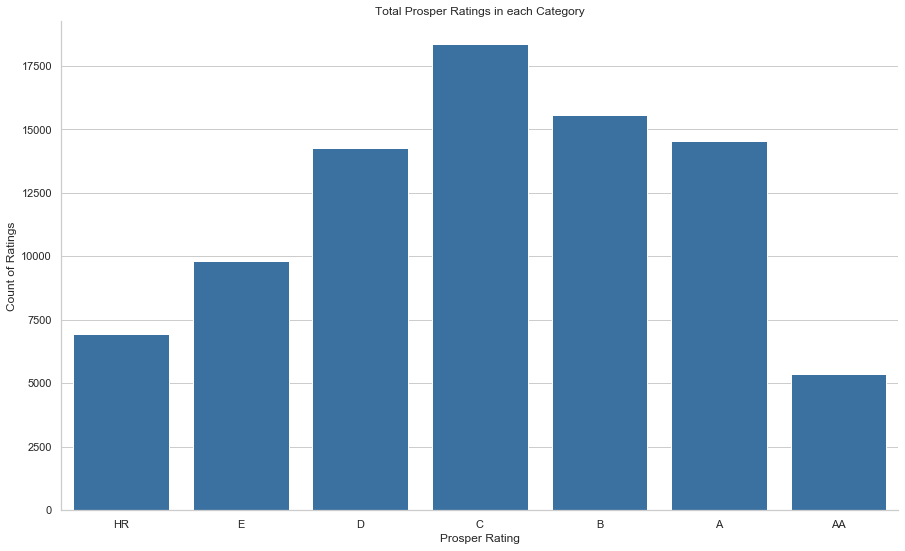

In [27]:
plt.figure(figsize = [15, 9]) 
base_color = sb.color_palette("RdBu_r", 7)[0]

sb.countplot(data = loans, x = 'ProsperRating', color = base_color);
    
plt.title('Total Prosper Ratings in each Category');
plt.xlabel('Prosper Rating');
plt.ylabel('Count of Ratings');
sb.despine(top = True);

- **Ratings are mainly the type of people, Prosper provides C to the people most.**
- **This means people with a certain type are given the most C. We will find who are these people with C rating.**

> *The Prosper Rating assigned at the time the listing was created between AA - HR.  Applicable for loans originated after July 2009.*

### Distribution of Prosper Scores.
***What are the most common scores ?***

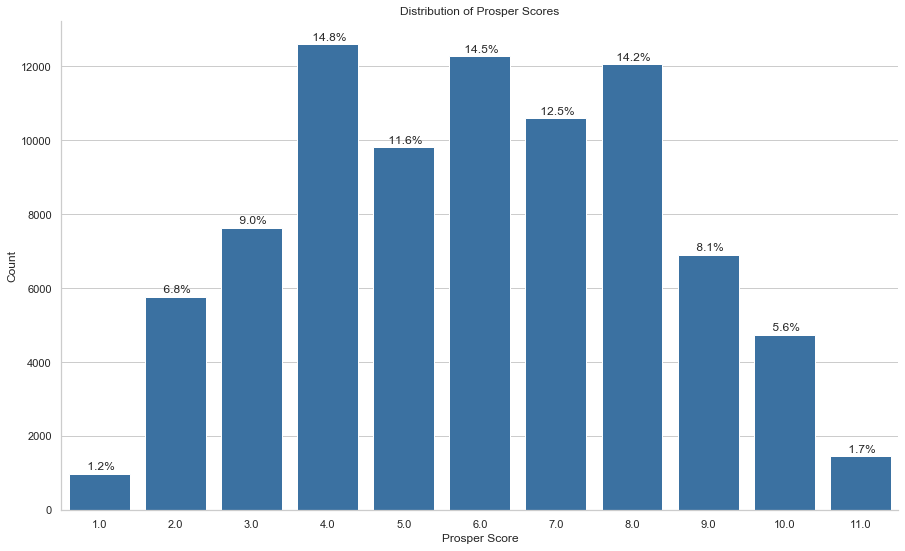

In [28]:
plt.figure(figsize = [15, 9]) 

sb.countplot(x = loans.ProsperScore, color = base_color)

locs, labels = plt.xticks()

counts = loans.groupby('ProsperScore').size()
total = loans.shape[0]
ticks, labels = plt.xticks()

for tick, i in zip(ticks, range(1,12)):
    count = counts[i]
    plt.text(x=tick, y=count+100, s=f'{(100*count/total): .1f}%', ha='center') 

plt.title('Distribution of Prosper Scores')
plt.xlabel('Prosper Score')
plt.ylabel('Count')
sb.despine(top = True);

- **Most used Propser Scores are 4, 6, 8.**
- **Distribution is kind of Trimodal as there are 3 bumps and modes in the data with almost 15 %.**

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Distribution of the Prosper Scores is interesting as it has kind of 3 Modes. We can find more about these values in bivariate analysis. There are many columns in the dataset which should not be used, also I have to change Listing Category_numeric to their original values and many columns to Categorical data.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> - *Distribution of Employment status, might contain redundant data as the Employed Status might contain Full Time and Part time and other things like Firemen or social service people etc.*
- *As checked before the Others data contains the data of Students, Firemen, Plumber etc who don't have fixed amount of earning every month. So, most of the time others data will provide a high bar. No, i didn't remove anything because seperating the others profession will reduce the credibility of the category who don't have fixed incomes also this will create more shorter proportions and create outliers in the plots.*

## Bivariate Exploration

> *In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).*

***To start we, will use correlation matrix or scatter plots to check relations.***

In [29]:
var = ['ProsperRating', 'ListingCategory', 'ProsperRating_Numeric',
       'ProsperScore', 'EmploymentStatus', 'IncomeRange',
       'StatedMonthlyIncome', 'DebtToIncomeRatio',
       'CurrentDelinquencies', 'Term',
       'TradesNeverDelinquent_percentage', 'Occupation', 'LoanStatus', 
       'BorrowerAPR', 'BorrowerRate', 'MonthlyLoanPayment',
       'LoanOriginalAmount', 'PercentFunded', 'Investors']

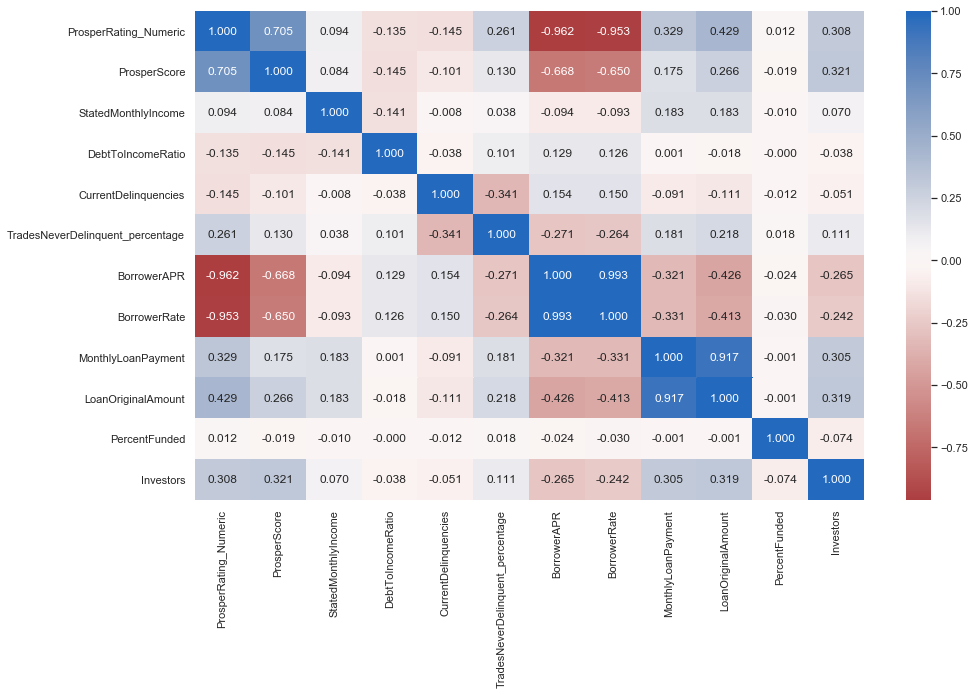

In [30]:
plt.figure(figsize = [15, 9])
sb.heatmap(loans[var].corr(), annot = True, fmt = '.3f', cmap = 'vlag_r', center = 0);

**As we can see**, there is high correlation between **(ProsperRating, ProsperScore), (BorrowerRate, BorrowerAPR), (LoanOriginalAmount, MonthlyLoanPayment)** and signinficant relation between **(LoanOriginalAmount, ProsperRating) and (Investors, ProsperRating).**

- We will be analysing these variables and few others.

In [31]:
# Transformation functions if neccessary
def cuberoot_trans(x, inverse = False):
    """ quick function for computing cube root and cube operations """
    if not inverse:
        return np.power(x, 1/3)
    else:
        return np.power(x, 3)

def log_trans(y, inverse = False):
    if not inverse:     
        return np.log10(y)     
    else:
        return np.power(10, y)

### Prosper Rating and Prosper Score
***How ProsperScore and Prosper Rating affect each other ?***

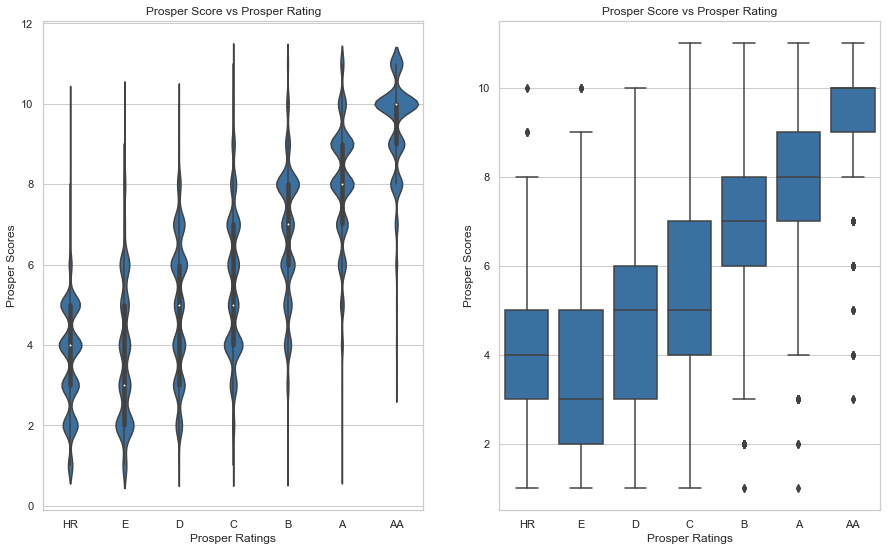

In [32]:
# Define figure size
plt.figure(figsize = [15, 9])

# Violin Plot and Box plot will give better insight.
plt.subplot(1,2,1)
sb.violinplot(data = loans, x = 'ProsperRating', y = 'ProsperScore', color = base_color)
plt.title('Prosper Score vs Prosper Rating')
plt.xlabel('Prosper Ratings');
plt.ylabel('Prosper Scores');

plt.subplot(1,2,2)
sb.boxplot(data = loans, x = 'ProsperRating', y = 'ProsperScore', color = base_color)
plt.xlabel('Prosper Ratings');
plt.ylabel('Prosper Scores');


plt.title('Prosper Score vs Prosper Rating');

- **The Prosper Rating assigned at the time the listing was created between AA - HR.  Applicable for loans originated after July 2009.**

- **A custom risk score built using historical Prosper data. The score ranges from 1-10, with 10 being the best, or lowest risk score.  Applicable for loans originated after July 2009.**

>**Loan Grades, Prosper Scores and Prosper Ratings**
- *As you can see in the graph Prosper has seven loan grades called Prosper Ratings: **AA, A, B, C, D, E and HR** where AA is the lowest risk down to HR which actually stands for high risk.*

- *Higher Risk results in the low Prosper Score and AA has high high Prosper Scores with median of 10.*
- *Also, the medians are almost closer to the the modes in the distribution of Prosper Score (4, 6 and 8).*

### Borrower Rate and BorrowerAPR
***What is the relation between Borrower Rates and Borrower Annual Percentage Rate ?.***

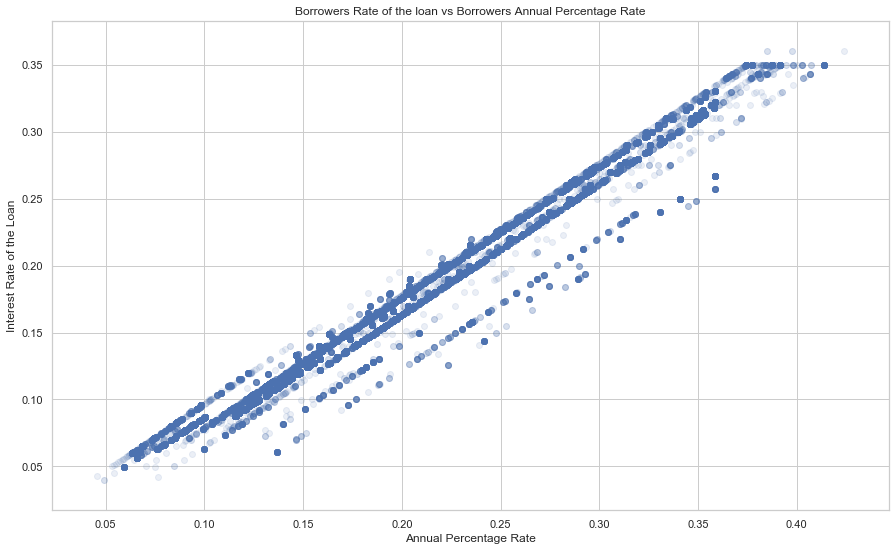

In [33]:
plt.figure(figsize = [15, 9])

# Scatter plot for two Numeric data
plt.scatter(x = loans.BorrowerAPR, y = loans.BorrowerRate, alpha = 1/9);
plt.xlabel('Annual Percentage Rate')
plt.ylabel('Interest Rate of the Loan')
plt.title('Borrowers Rate of the loan vs Borrowers Annual Percentage Rate');

- **Interest rate** *refers to the annual cost of a loan to a borrower and is expressed as a percentage*

- **APR is the annual cost of a loan to a borrower** — *including fees. Like an interest rate, the APR is expressed as a percentage. Unlike an interest rate, however, it includes other charges or fees such as mortgage insurance, most closing costs, discount points and loan origination fees.*

**The APR is intended to give you more information about what you’re really paying.** The Federal Truth in Lending Act requires that every consumer loan agreement disclose the APR. Since all lenders must follow the same rules to ensure the accuracy of the APR, borrowers can use the APR as a good basis for comparing certain costs of loans.

***There is a Linear and strong correlation between Interest Rate and Annual Percentage Rate***

### Loan Amount vs Monthly Loan Payment
***How Monthly Loan payment varies with Loan Amount ?***

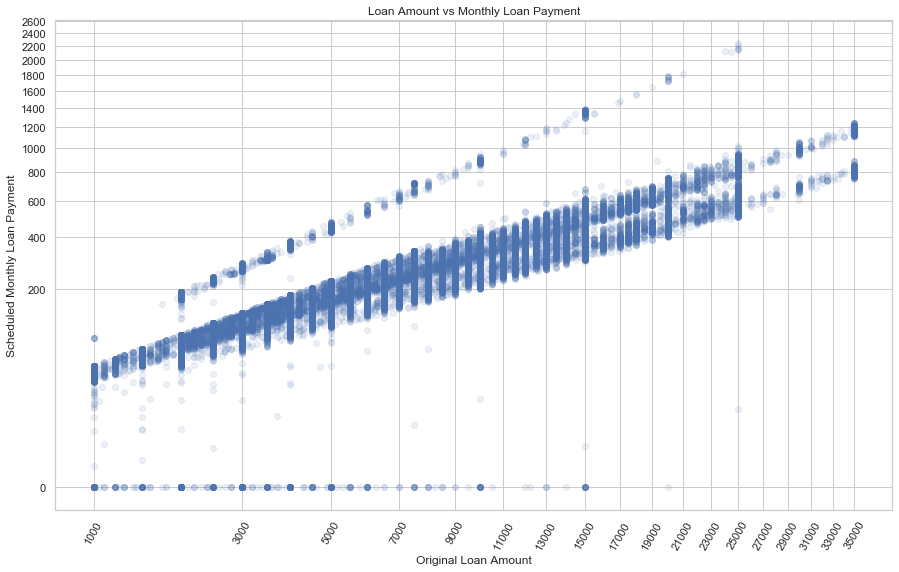

In [34]:
plt.figure(figsize = [15, 9])

# Scatter plot for two Numeric data
plt.scatter(y = loans.MonthlyLoanPayment.apply(cuberoot_trans),x = loans.LoanOriginalAmount.apply(cuberoot_trans), alpha = 1/9);

x_ticks = np.arange(1000, 35000 + 2000, 2000)
plt.xticks(cuberoot_trans(x_ticks), x_ticks, rotation = 60)

y_ticks = np.arange(0, 2500 + 200, 200)
plt.yticks(cuberoot_trans(y_ticks), y_ticks)

plt.xlabel('Original Loan Amount')
plt.ylabel('Scheduled Monthly Loan Payment')
plt.title('Loan Amount vs Monthly Loan Payment');

- **From above visualization, We can see that higher loan amount used to have higher Monthly Payment.**
- Also monthly loan payment is directly proportional to the Loan amount, this might be fixed by Prosper.

*We have to check how the loan amount is related to monthly income of the Person.*

### Loan Amount vs Prosper Rating
***Does loan amount varies according to Prosper Rating ?***

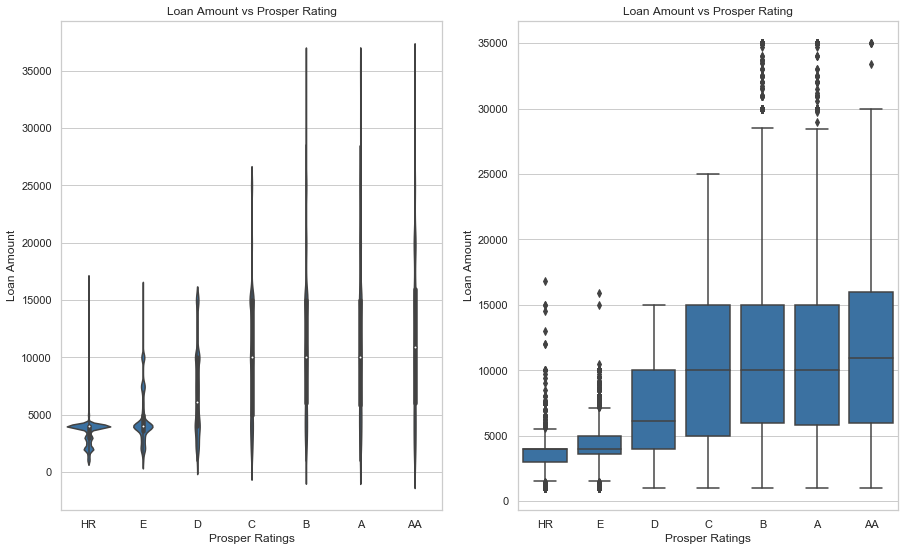

In [35]:
# Define figure size
plt.figure(figsize = [15, 9])

# Violin Plot and Box plot will give better insight.
plt.subplot(1,2,1)
sb.violinplot(data = loans, x = 'ProsperRating', y = 'LoanOriginalAmount', color = base_color)
plt.title('Loan Amount vs Prosper Rating')
plt.xlabel('Prosper Ratings')
plt.ylabel('Loan Amount')

plt.subplot(1,2,2)
sb.boxplot(data = loans, x = 'ProsperRating', y = 'LoanOriginalAmount', color = base_color)

plt.title('Loan Amount vs Prosper Rating');
plt.xlabel('Prosper Ratings')
plt.ylabel('Loan Amount');

- We can't tell much about how loan amount varies from the Prosper Ratings but as we see the **medians varies from risk factor.**
- **High Risk people get less amount of loan and the trend is increasing as lower the risk higher the loan amount.**

*Why should prosper lend money to high risk people ?* 

### Investors vs Prosper Rating
***Does good ratings attract investors ?***

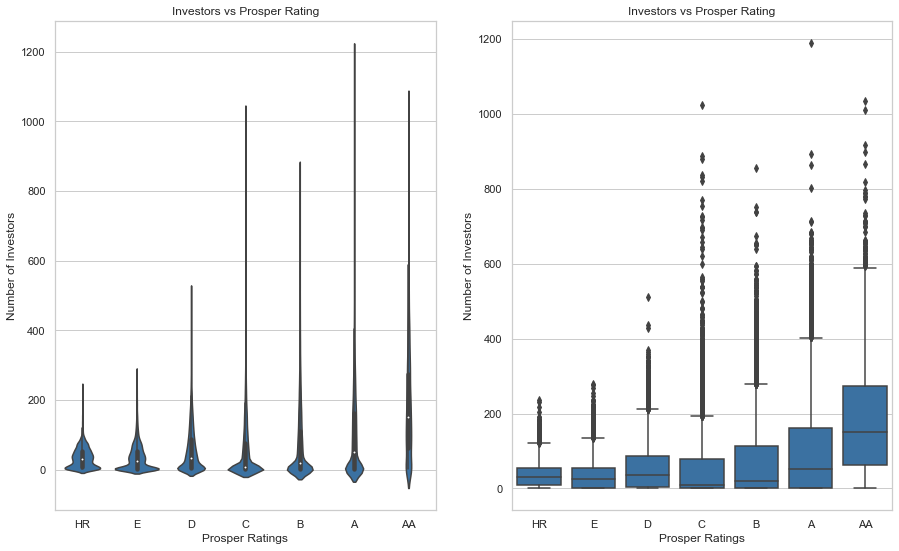

In [36]:
# Define figure size
plt.figure(figsize = [15, 9])

# Violin Plot and Box plot will give better insight.
plt.subplot(1,2,1)
sb.violinplot(data = loans, x = 'ProsperRating', y = 'Investors', color = base_color)
plt.title('Investors vs Prosper Rating')
plt.xlabel('Prosper Ratings')
plt.ylabel('Number of Investors')

plt.subplot(1,2,2)
sb.boxplot(data = loans, x = 'ProsperRating', y = 'Investors', color = base_color)

plt.title('Investors vs Prosper Rating');
plt.xlabel('Prosper Ratings')
plt.ylabel('Number of Investors');

***We can say that good ratings might attract investors but this might not be the case as it's hard to conclude that good ratings attract investors from above visualization.***

### Monthly Loan Payment vs Occupation
***Who pays the high monthly loan payment ?***

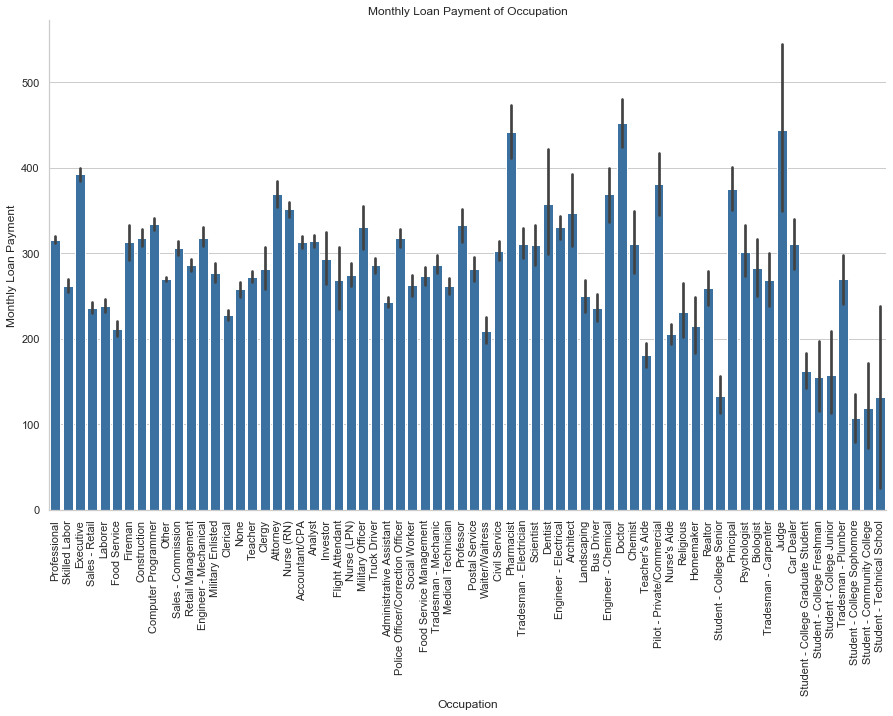

In [37]:
plt.figure(figsize = [15, 9])

sb.barplot(data = loans, x = 'Occupation', y = 'MonthlyLoanPayment', color = base_color)
plt.xticks(rotation = 90);
plt.xlabel('Occupation')
plt.ylabel('Monthly Loan Payment')

plt.title('Monthly Loan Payment of Occupation')
sb.despine(top = True);

***Judge, Pharamcist and Doctors pays the high monthly loan payment which is not unusual as these are the highest paid professions of the economy and the world.***

### Prosper Rating vs BorrowerRates
***What is the relation between Prosper Ratings and Borrower Rates ?***

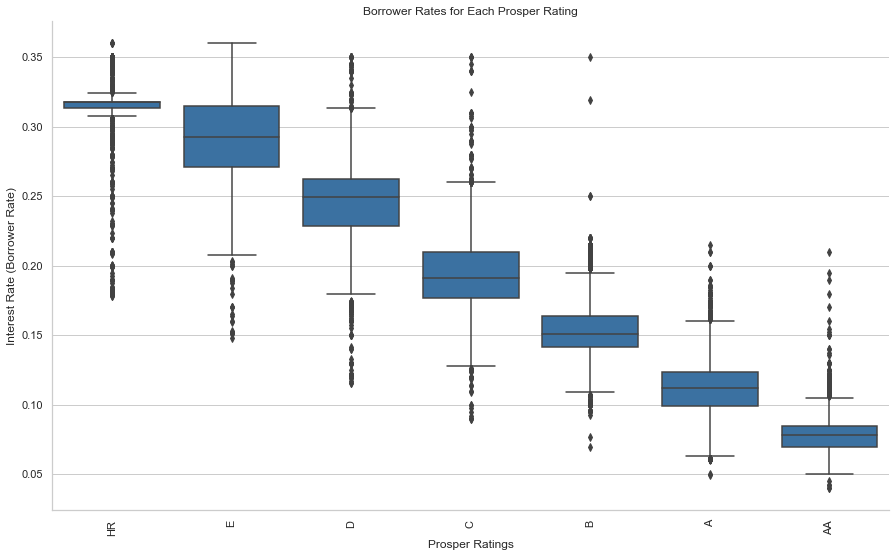

In [38]:
plt.figure(figsize = [15, 9])

sb.boxplot(data = loans, x = 'ProsperRating', y = 'BorrowerRate', color = base_color)
plt.xticks(rotation = 90);
plt.xlabel('Prosper Ratings')
plt.ylabel('Interest Rate (Borrower Rate)')

plt.title('Borrower Rates for Each Prosper Rating')
sb.despine(top = True);

***According to plot, high risk accounts have high borrower rates or we can say Prosper use to rate people according to their Interest rate of the loans.***

### Prosper Rating vs Employment Status
**Does Employment affect Prosper Rating ?**

In [39]:
counts = loans.groupby(['ProsperRating', 'EmploymentStatus']).size()
counts = counts.reset_index(name = 'count')
counts = counts.pivot(index = 'ProsperRating', columns = 'EmploymentStatus', values = 'count')
counts

EmploymentStatus,Employed,Other,Full-time,Part-time,Retired,Self-employed,Not employed
ProsperRating,,,,,,,
HR,4609,491,893,32,53,656,201
E,7402,582,926,46,50,659,130
D,11004,714,1533,55,86,750,132
C,15002,868,1289,30,54,1020,82
B,13507,600,681,22,39,679,53
A,11629,425,1739,55,56,601,46
AA,4157,126,866,16,29,173,5


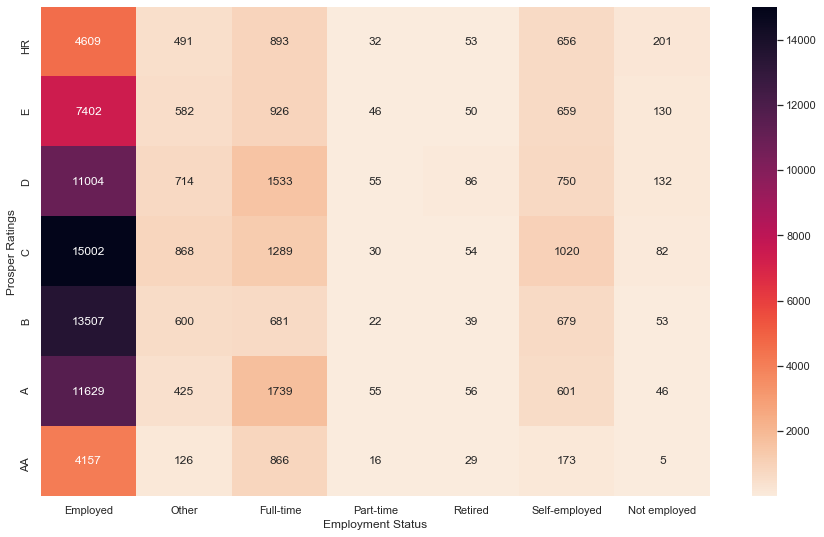

In [40]:
plt.figure(figsize = [15,9])
sb.heatmap(counts, annot = True, fmt = 'd', cmap = sb.cm.rocket_r);
plt.ylabel('Prosper Ratings')
plt.xlabel('Employment Status');

- Self Employed people have more C rating while unemployed have HR rating.
- **Employment does have a significant affect on the ratings.**

### Listing Category vs Occupation

In [41]:
counts = loans.groupby(['Occupation', 'ListingCategory']).size()
counts = counts.reset_index(name = 'count')
counts = counts.pivot(index = 'Occupation', columns = 'ListingCategory', values = 'count')
counts.head(20)

ListingCategory,Auto,Baby&Adoption,Boat,Business,Cosmetic Procedure,Debt Consolidation,Engagement Ring,Green Loans,Home Improvement,Household Expanses,Large Purchases,Medical/Dental,Motorcycle,Not Available,Other,RV,Student Use,Taxes,Vacation,Wedding Loans
Occupation,,,,,,,,,,,,,,,,,,,,
Professional,230,28,10,684,8,6725,26,9,922,228,98,202,24,4,1007,5,17,145,87,83
Skilled Labor,82,4,7,102,2,1348,8,1,199,47,33,29,16,0,236,0,5,19,25,17
Executive,50,6,6,324,1,2172,11,1,358,59,42,70,12,0,257,1,0,52,18,28
Sales - Retail,83,0,1,202,3,1220,4,1,115,58,24,21,9,0,226,1,15,9,25,12
Laborer,47,3,0,34,0,791,0,0,85,36,16,13,8,0,146,1,5,12,13,7
Food Service,38,1,0,64,2,493,1,1,51,29,9,14,2,0,108,0,2,3,14,5
Fireman,15,1,0,22,0,194,2,0,44,4,0,1,3,0,26,1,0,3,1,2
Construction,37,0,3,141,1,800,3,0,106,21,19,21,11,1,121,2,5,11,17,6
Computer Programmer,86,6,4,263,2,1933,10,2,308,68,41,46,9,0,348,3,8,39,25,35


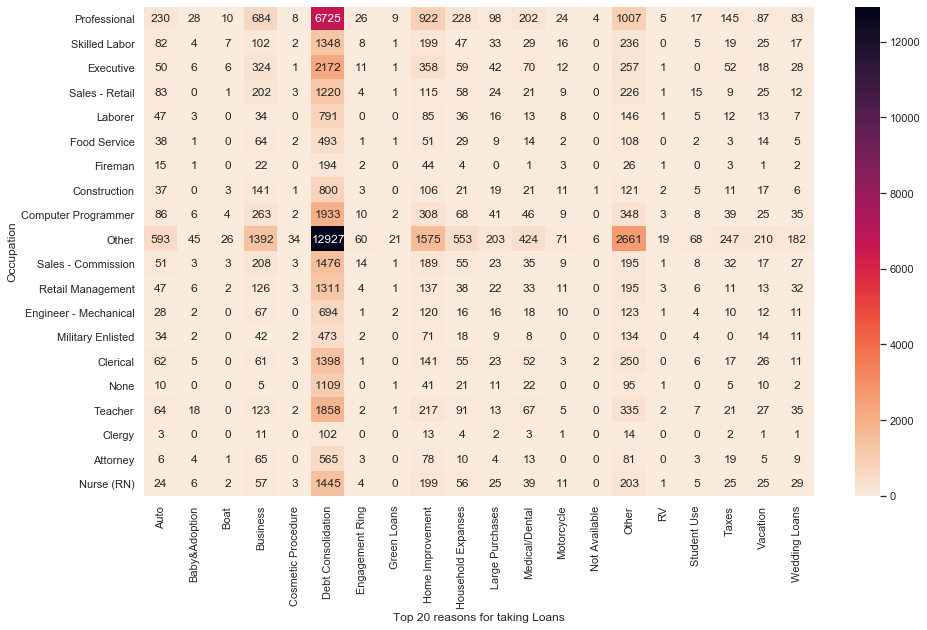

In [42]:
plt.figure(figsize = [15,9])
sb.heatmap(counts.head(20), annot = True, fmt = 'd', cmap = sb.cm.rocket_r);
plt.xlabel('Top 20 reasons for taking Loans')
plt.ylabel('Occupation');

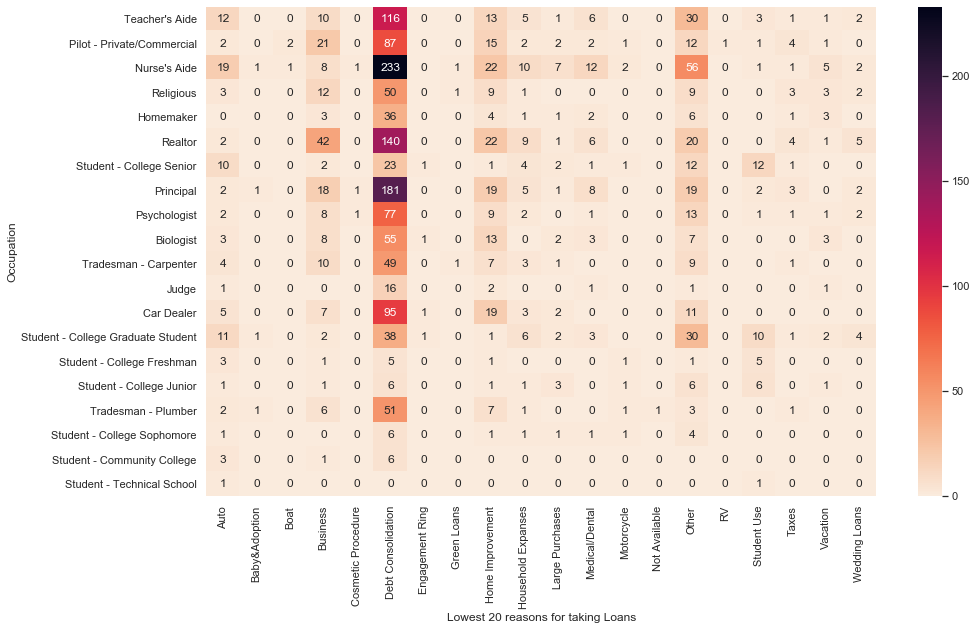

In [43]:
plt.figure(figsize = [15,9])
sb.heatmap(counts.tail(20), annot = True, fmt = 'd', cmap = sb.cm.rocket_r);
plt.xlabel('Lowest 20 reasons for taking Loans')
plt.ylabel('Occupation');

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> *Prosper Ratings are assigned by considering many factors of the person which includes Employment Status, Occupation, Loan Amount and affects many factors also including Number of Investors, Loan Amount, Borrower Rates in direct or indirect manner. **Prosper Ratings are correlated with many variables** including High rates, Monthly laon payments and how much amount to give to an indivisual. **Brorrower Rates are directly proportional to the Annual Percentage rate**.*

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> *Prosper use to give loans at **low rates only to the people with low risk profile** and **occupation matters** as equal to the Ratings, which means people with high income pay more monthly payments which are also dependent on type of Occupation. Students take loans only for debt consolidation and People with stable income has high chances of getting loans at lower interest rate. Studens have less loans as compared to the Professionals.* 

## Multivariate Exploration

> *Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.*

### BorrowerRates by ProsperRating and ProsperScore 
***How Prosper Ratings, Prosper Scores and Rates are related ?***

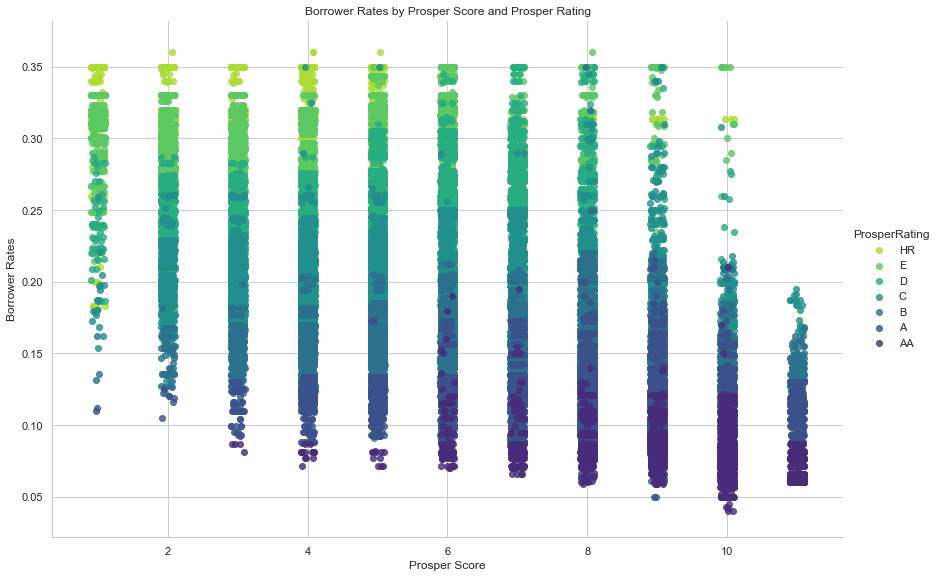

In [44]:
g = sb.FacetGrid(data = loans, hue = 'ProsperRating', height = 8, aspect = 1.5, palette = 'viridis_r');
g.map(sb.regplot, 'ProsperScore', 'BorrowerRate', x_jitter = 0.1, fit_reg = False);
g.add_legend();

plt.xlabel('Prosper Score');
plt.ylabel('Borrower Rates');
plt.title('Borrower Rates by Prosper Score and Prosper Rating');

- **With increase in Prosper Score the accounts with Good Prosper rating increase with low borrower rates as with low prosper scores there are a lot of high risk profiles with high borrower rates.**
- *According to plot, almost all **high risk ratings lies within the score of 1 - 6** and **low risks have increased numbers between 6 - 11**.*

### BorrowerAPR by Prosper Rating and Loan Amount

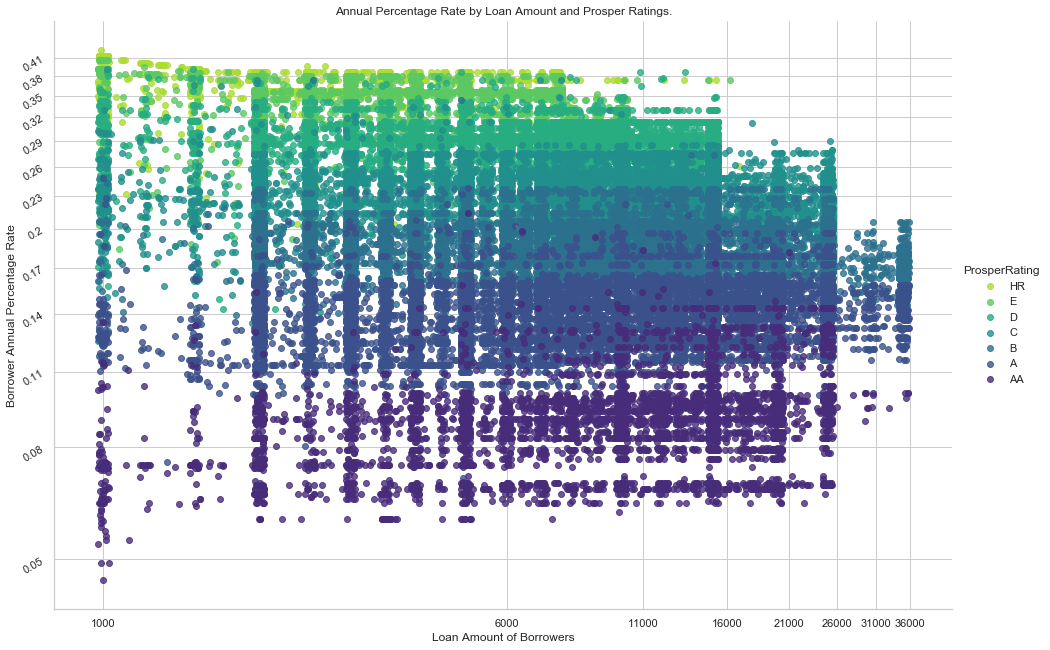

In [45]:
loans['log_amount'] = loans.LoanOriginalAmount.apply(log_trans)
loans['log_borrower'] = loans.BorrowerAPR.apply(log_trans)

g = sb.FacetGrid(data = loans, hue = 'ProsperRating', height = 9, aspect = 1.5, palette = 'viridis_r');
g.map(sb.regplot,  'log_amount', 'log_borrower', x_jitter = 0.01, fit_reg = False);

x_tick = np.arange(1000, int(loans['LoanOriginalAmount'].max()) + 5000, 5000)
plt.xticks(log_trans(x_tick), (x_tick))

y_ticks = np.arange(loans['BorrowerAPR'].min(), loans['BorrowerAPR'].max(), 0.03)
for i in range(len(y_ticks)):
    y_ticks[i] = round(y_ticks[i], 2)

plt.yticks(log_trans(y_ticks), y_ticks, rotation = 30)

plt.ylabel('Borrower Annual Percentage Rate')
plt.xlabel('Loan Amount of Borrowers')
plt.title('Annual Percentage Rate by Loan Amount and Prosper Ratings.')
g.add_legend();

### Loan Amount by Income Range and status whether a Home Owner or not ?

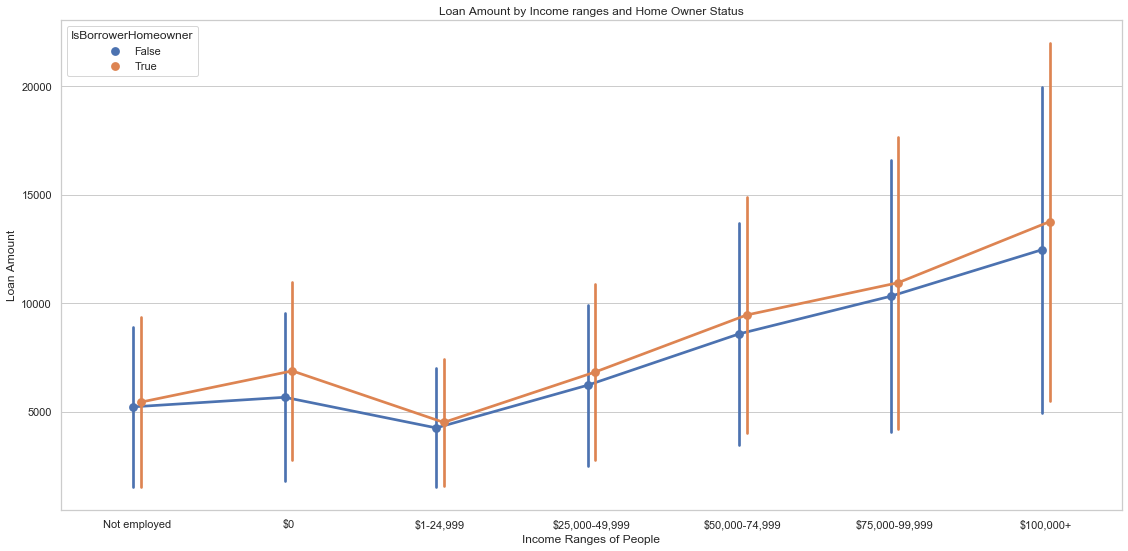

In [46]:
plt.figure(figsize  = (19, 9));
sb.pointplot(data = loans, x = 'IncomeRange', y = 'LoanOriginalAmount', hue = 'IsBorrowerHomeowner', 
             ci = 'sd', dodge = True);
plt.xlabel('Income Ranges of People');
plt.ylabel('Loan Amount')
plt.title('Loan Amount by Income ranges and Home Owner Status');

***They have provided higher loans to the people who have own houses in every income range.***

### Monthly Loan Payment by Loan Amount and Term

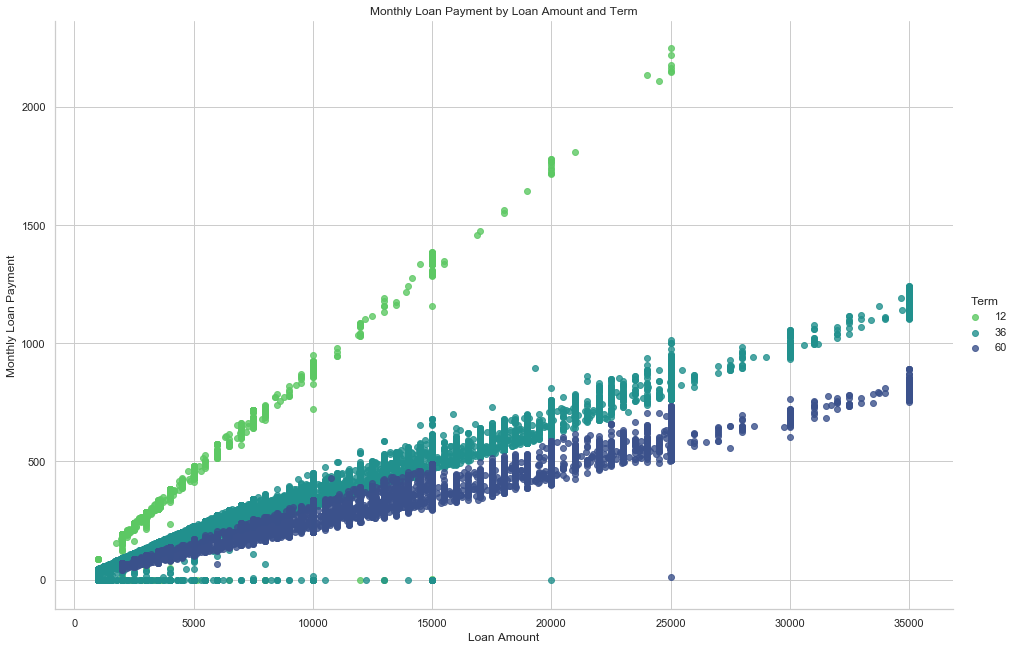

In [47]:
g = sb.FacetGrid(data = loans, hue = 'Term', height = 9, aspect = 1.5, palette = 'viridis_r');
g.map(sb.regplot,  'LoanOriginalAmount', 'MonthlyLoanPayment', x_jitter = 0.01, fit_reg = False);
g.add_legend();

plt.ylabel('Monthly Loan Payment');
plt.xlabel('Loan Amount');
plt.title('Monthly Loan Payment by Loan Amount and Term');

***As the Term increases the monthly loan payment decreases and the loan amount increases.*** 
- We have to check if the how Borrower Rate changes as term and Loan amount increases

### BorrowerRate by Term  and Loan Amount 

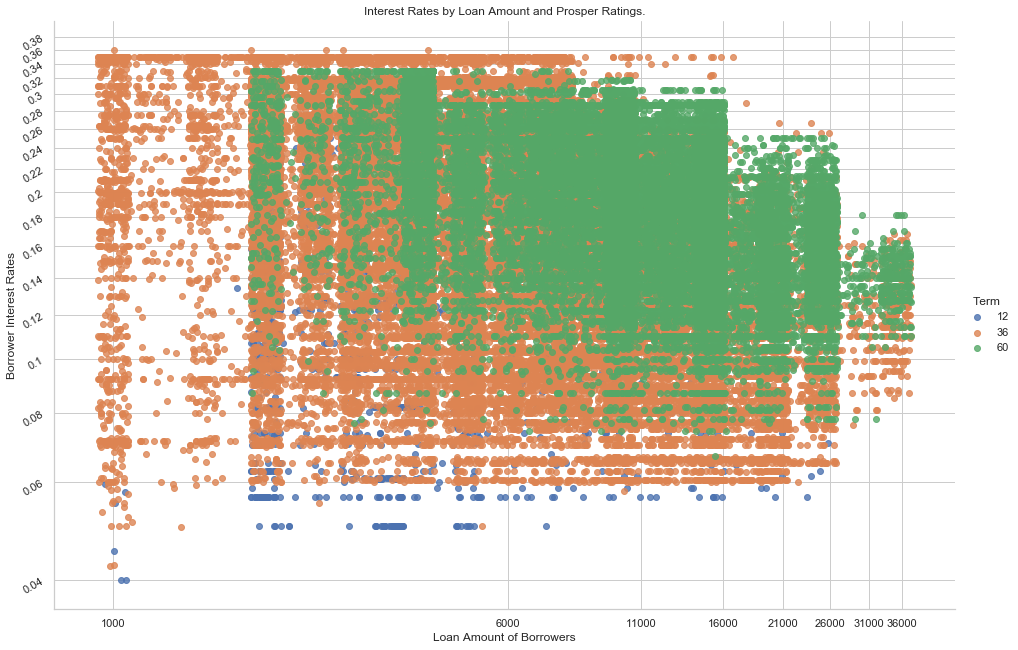

In [48]:
loans['log_amount'] = loans.LoanOriginalAmount.apply(log_trans)
loans['log_rate'] = loans.BorrowerRate.apply(log_trans)

g = sb.FacetGrid(data = loans, hue = 'Term', height = 9, aspect = 1.5);
g.map(sb.regplot, 'log_amount', 'log_rate',  x_jitter = 0.03, fit_reg = False);
g.add_legend();


x_tick = np.arange(1000, int(loans['LoanOriginalAmount'].max()) + 5000, 5000)
plt.xticks(log_trans(x_tick), (x_tick))

y_ticks = np.arange(loans['BorrowerRate'].min(), loans['BorrowerRate'].max() + 0.04, 0.02)
for i in range(len(y_ticks)):
    y_ticks[i] = round(y_ticks[i], 2)

plt.yticks(log_trans(y_ticks), y_ticks, rotation = 30)

plt.ylabel('Borrower Interest Rates');
plt.xlabel('Loan Amount of Borrowers');
plt.title('Interest Rates by Loan Amount and Prosper Ratings.');

***Not much can be concluded.***
- Seems like term of 36 Months to pay loan amount is taken more by people and also borrowers rate are uniform as Term of 60 usually have median borrower rates and 12 months term are not much popular or chosen.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> *Prosper Ratings has a significant relationship with borrower rates and loan amounts as better rating means low borrower rates and low annual percentage rate. Also, higher the Term duration lower the low monthly payments of the loan amounts which also means that higher Term peroid has low risk profiles i,e better prosper ratings. Loan amounts are higher for the people who have their own homes which assures the security to prosper.*  

### Were there any interesting or surprising interactions between features?

> *As, Term affects the monthly loan payments as higher the Term lower the monthly payment, however there is no good relation between Term and interest rates of the loan. Interest are uniform for all Terms and 12 months peroid are choosen by very less amount of people or they are the people with high risk profile.*